In [1]:
# Comparison of the K-Means and MiniBatchMeans clustering algorithms

import time 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs

In [2]:
# Generate sample data
'''
sample cluster를 만들때에는 make_blobs를 사용한다.
n_samples : 데이터 수
centers : 미리 센터를 지정할 수 있다.
cluster_std : 군집의 표준편차를 설정한다. 
'''

np.random.seed(0)

batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)

x, labels_true = make_blobs(n_samples=3000, centers = centers, cluster_std = 0.7)

# Compute clustering with Means 
k_means = KMeans(init = 'k-means++', n_clusters =3, n_init = 10)
t0 = time.time()
k_means.fit(x)

t_batch = time.time() - t0

mbk = MiniBatchKMeans(
    init = 'k-means++', 
    n_clusters = 3, 
    batch_size = batch_size, 
    n_init = 10, 
    max_no_improvement = 10, 
    verbose = 0
)

t0 = time.time()
mbk.fit(x)
t_mini_batch = time.time() - t0

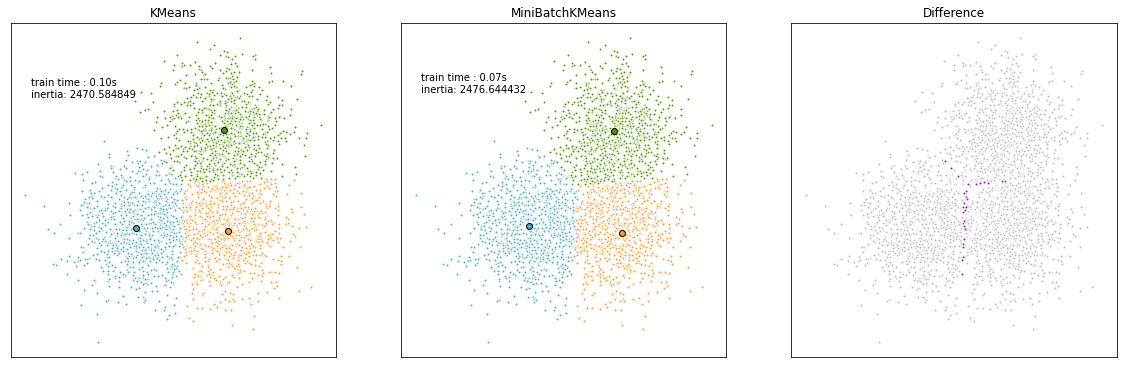

In [24]:
# plot  result
fig = plt.figure(figsize = (16, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

k_means_cluster_centers = k_means.cluster_centers_
order = pairwise_distances_argmin(k_means.cluster_centers_, mbk.cluster_centers_) # pairwise_distances_argmin 두 클러스터링의 중심을 비교하여 .
mbk_means_cluster_centers = mbk.cluster_centers_[order]

k_means_labels = pairwise_distances_argmin(x, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(x, mbk_means_cluster_centers)

ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k 
    cluster_center = k_means_cluster_centers[k]
    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor = col, marker = '.')
    ax.plot(
        cluster_center[0],
        cluster_center[1], 
        'o', 
        markerfacecolor = col, 
        markeredgecolor = 'k', 
        markersize = 6
    )
ax.set_title('KMeans')
ax.set_xticks([])
ax.set_yticks([])
plt.text(-3.5, 1.7, 'train time : %.2fs\ninertia: %f' % (t_batch, k_means.inertia_))

# MiniBatchMeans

ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == k 
    cluster_center = mbk_means_cluster_centers[k]
    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor = col, marker = '.')
    ax.plot(
        cluster_center[0], 
        cluster_center[1], 
        'o', 
        markerfacecolor = col, 
        markeredgecolor = 'k', 
        markersize = 6
    )
ax.set_title('MiniBatchKMeans')
ax.set_xticks([])
ax.set_yticks([])
plt.text(-3.5, 1.8, 'train time : %.2fs\ninertia: %f' % (t_mini_batch, mbk.inertia_))

different = mbk_means_labels == 4
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += (k_means_labels == k) != (mbk_means_labels == k)
    
identic = np.logical_not(different)
ax.plot(x[identic, 0], x[identic, 1], 'w', markerfacecolor = '#bbbbbb', marker = '.')
ax.plot(x[different, 0], x[different, 1], 'w', markerfacecolor = 'm', marker = '.')
ax.set_title('Difference')
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('clustering.png', dpi = 200)
plt.show()